## Exercise Tracker with 1RM Estimation and Progress Visualization

This Jupyter notebook presents a Python-based tool for tracking strength training exercises. The tool, implemented in the form of a class named ExerciseTracker, allows users to log each exercise session, including the name of the exercise, weight lifted, and repetitions performed.

One unique feature of this tool is its ability to estimate the user's one-repetition maximum (1RM) for each logged exercise, using a commonly-used estimation formula:

`1RM = weight + (weight * reps * 0.0333)`

In addition to tracking exercise sessions and estimating 1RM, the ExerciseTracker class provides a function for visualizing the progression of the estimated 1RM over time. The function generates a scatter plot that represents the estimated 1RM for a given exercise on each day it was performed. This feature enables users to visually track their progress and monitor improvements in strength over time.

The tracker supports multiple exercises and keeps each exercise log separate for individual analysis. The data is maintained in a pandas DataFrame, making it easy to manipulate and analyze outside the class methods if desired.

By providing an efficient way to log, calculate, and visualize strength progress, this tool can help users to stay motivated and focused on their fitness goals.

### Importing libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Simple version

In [21]:
class ExerciseTracker:
    def __init__(self):
        self.exercises = {}

    def log_exercise(self, name, weight, reps):
        self.exercises[name] = {
            'weight': weight,
            'reps': reps
        }

    def calculate_1rm(self, name):
        exercise = self.exercises.get(name)
        if exercise:
            weight = exercise['weight']
            reps = exercise['reps']
            return weight + (weight * reps * 0.0333)
        else:
            print(f"No data for exercise {name}")
            return None


In [22]:
tracker = ExerciseTracker()

In [23]:
name = 'Snatch'
weight = 50
reps = 5
tracker.log_exercise(name, weight, reps)

In [24]:
name = 'Snatch'
result = tracker.calculate_1rm(name)
if result:
    print(f"The estimated 1RM for {name} is {result} kg")

The estimated 1RM for Snatch is 58.325 kg


### Dataframe version

This block of code initializes a dictionary, data, which will serve as the base data for the ExerciseTracker. The dictionary contains four keys: 'Exercise', 'Weight', 'Reps', and 'Date'. Each of these keys corresponds to a different attribute of the exercise routines.

* Exercise: This represents a list of different exercises the user will be tracking.
* Weight: This is a list of the weights (in kilograms) that the user lifted for the corresponding exercise.
* Reps: This is a list of the number of repetitions the user performed for the corresponding exercise. Note that for this initial data, all the exercises are logged with one repetition (1RM).
* Date: This is a list of the dates on which the exercises were performed. 2023-06-01 was used as the baseline date.

The dictionary data is then converted into a pandas DataFrame, df, which will serve as the initial state of the ExerciseTracker. This DataFrame will then be used to log, track, and visualize the user's exercise routine.

In [25]:
data = {
    'Exercise': ['Front Squat', 'Snatch', 'Back Squat', 'Power Snatch', 'Deadlift', 'Power Clean', 'Clean and Jerk', 'Push Jerk', 'Split Jerk', 'Bench Press', 'Hang Snatch', 'Overhead Squat', 'Push Press', 'Hang Clean', 'Clean', 'Strict Press'],
    'Weight': [92.5, 65,110,57.5,110,75,70,62.5,72.5,70,57.5,57.5,52.5,70,82.5,50],
    'Reps': [1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    'Date': pd.to_datetime(['2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01', '2023-06-01'])  # convert strings to datetime
}

df = pd.DataFrame(data)

In [26]:
df

,Exercise,Weight,Reps,Date
0,Front Squat,92.5,1,2023-06-01
1,Snatch,65.0,1,2023-06-01
2,Back Squat,110.0,1,2023-06-01
3,Power Snatch,57.5,1,2023-06-01
4,Deadlift,110.0,1,2023-06-01
5,Power Clean,75.0,1,2023-06-01
6,Clean and Jerk,70.0,1,2023-06-01
7,Push Jerk,62.5,1,2023-06-01
8,Split Jerk,72.5,1,2023-06-01
9,Bench Press,70.0,1,2023-06-01


The `ExerciseTracker` class serves as the primary tool for managing and analyzing the user's exercise routines. It contains several methods, each serving a specific purpose:

* `__init__`: This method initializes the `ExerciseTracker` object with a pandas DataFrame, which will store the exercise data.
* `log_exercise`: This method allows the user to log an exercise session, including the exercise name, weight lifted, repetitions performed, and the date of the exercise. This data is appended to the existing DataFrame.
* `calculate_1rm`: This method calculates and returns the estimated one-repetition maximum (1RM) for a specific exercise. It utilizes the formula 1RM = weight + (weight * reps * 0.0333) for this estimation.
* `plot_1rm`: This method generates a scatter plot showing the estimated 1RM over time for a specific exercise. It plots the dates (on which the exercise was performed) against the estimated 1RM values. A line connects the points to better visualize the progression.

The functionality of this class allows for easy logging of exercise data, calculation of 1RM, and visual tracking of progress over time.

In [36]:
class ExerciseTracker:
    def __init__(self, df):
        self.df = df

    def log_exercise(self, name, weight, reps, date=datetime.now().date()):
        new_data = {
            'Exercise': [name],
            'Weight': [weight],
            'Reps': [reps],
            'Date': [pd.to_datetime(date)]  # convert to datetime
        }
        new_df = pd.DataFrame(new_data)
        self.df = pd.concat([self.df, new_df], ignore_index=True)

    def calculate_1rm(self, name):
        exercise_data = self.df[self.df['Exercise'] == name]
        if not exercise_data.empty:
            weight = exercise_data['Weight'].iloc[-1]  # get the latest weight
            reps = exercise_data['Reps'].iloc[-1]  # get the latest reps
            return weight + (weight * reps * 0.0333)
        else:
            print(f"No data for exercise {name}")
            return None
    def plot_1rm(self, name):
        exercise_data = self.df[self.df['Exercise'] == name]
        if not exercise_data.empty:
            dates = exercise_data['Date'].dt.strftime('%Y-%m-%d')  # convert to string format
            weights = exercise_data['Weight']
            reps = exercise_data['Reps']
            estimated_1rm = weights + (weights * reps * 0.0333)

            plt.figure(figsize=(10, 6))
            plt.scatter(dates, estimated_1rm)
            plt.plot(dates, estimated_1rm)
            plt.title(f'Estimated 1RM for {name} Over Time')
            plt.xlabel('Date')
            plt.ylabel('Estimated 1RM (kg)')
            plt.xticks(rotation=45)  # rotate the x-axis labels for better readability

            # Make x-axis display only dates that have data
            ax = plt.gca()  # get current axis
            ax.set_xticks(dates)  # set x-axis ticks to dates that have data

            plt.tight_layout()  # adjust the layout for better readability
            plt.show()
        else:
            print(f"No data for exercise {name}")

In [28]:
tracker = ExerciseTracker(df)
tracker.log_exercise('Back Squat', 90, 3, '2023-06-08')

In [29]:
result = tracker.calculate_1rm('Back Squat')
if result:
    print(f"The estimated 1RM for Back Squat is {result} kg")

The estimated 1RM for Back Squat is 98.991 kg


In [30]:
print(tracker.df)

          Exercise  Weight  Reps       Date
0      Front Squat    92.5     1 2023-06-01
1           Snatch    65.0     1 2023-06-01
2       Back Squat   110.0     1 2023-06-01
3     Power Snatch    57.5     1 2023-06-01
4         Deadlift   110.0     1 2023-06-01
5      Power Clean    75.0     1 2023-06-01
6   Clean and Jerk    70.0     1 2023-06-01
7        Push Jerk    62.5     1 2023-06-01
8       Split Jerk    72.5     1 2023-06-01
9      Bench Press    70.0     1 2023-06-01
10     Hang Snatch    57.5     1 2023-06-01
11  Overhead Squat    57.5     1 2023-06-01
12      Push Press    52.5     1 2023-06-01
13      Hang Clean    70.0     1 2023-06-01
14           Clean    82.5     1 2023-06-01
15    Strict Press    50.0     1 2023-06-01
16      Back Squat    90.0     3 2023-06-08


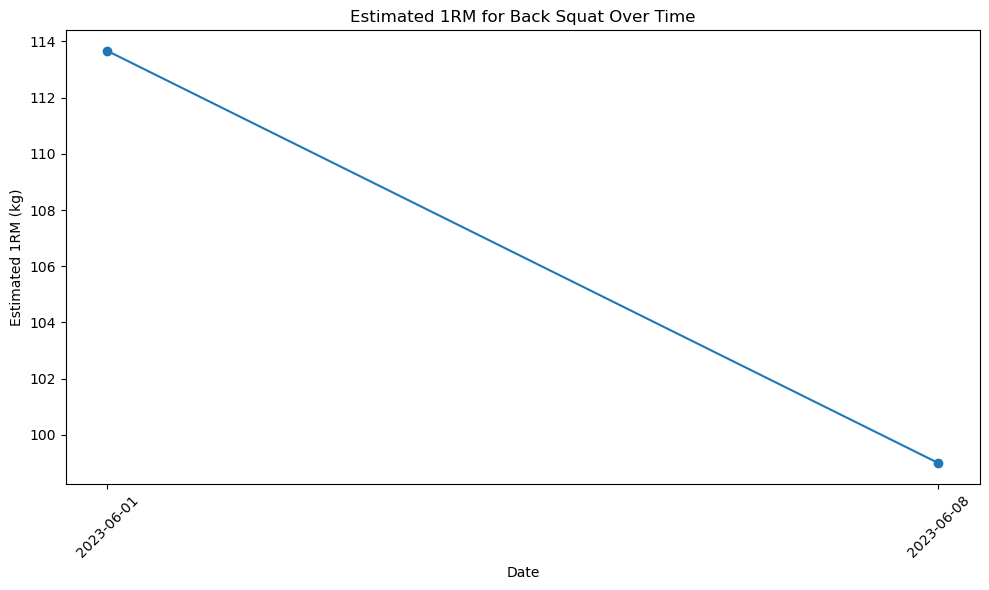

In [31]:
tracker.plot_1rm('Back Squat')

In [32]:
tracker.df.to_csv('../data/exercise_log.csv', index=False)

### Starting with the saved data

In [37]:
df = pd.read_csv('../data/exercise_log.csv', parse_dates=['Date'])
tracker = ExerciseTracker(df)

In [38]:
exercise_name = 'Deadlift'
tracker.log_exercise(exercise_name, 90, 3, '2023-06-12')
result = tracker.calculate_1rm(exercise_name)
if result:
    print(f"The estimated 1RM for {exercise_name} is {result} kg")

The estimated 1RM for Deadlift is 98.991 kg


In [39]:
print(tracker.df)

          Exercise  Weight  Reps       Date
0      Front Squat    92.5     1 2023-06-01
1           Snatch    65.0     1 2023-06-01
2       Back Squat   110.0     1 2023-06-01
3     Power Snatch    57.5     1 2023-06-01
4         Deadlift   110.0     1 2023-06-01
5      Power Clean    75.0     1 2023-06-01
6   Clean and Jerk    70.0     1 2023-06-01
7        Push Jerk    62.5     1 2023-06-01
8       Split Jerk    72.5     1 2023-06-01
9      Bench Press    70.0     1 2023-06-01
10     Hang Snatch    57.5     1 2023-06-01
11  Overhead Squat    57.5     1 2023-06-01
12      Push Press    52.5     1 2023-06-01
13      Hang Clean    70.0     1 2023-06-01
14           Clean    82.5     1 2023-06-01
15    Strict Press    50.0     1 2023-06-01
16      Back Squat    90.0     3 2023-06-08
17        Deadlift    90.0     3 2023-06-12


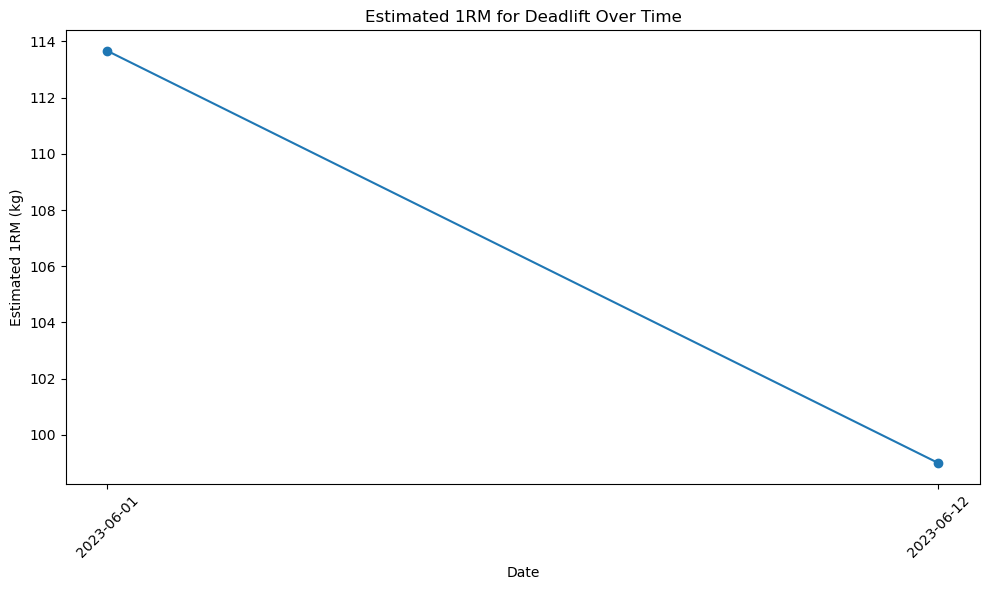

In [40]:
tracker.plot_1rm(exercise_name)